# Data-Driven Modelling for Financial Markets Coursework

## 1. Chosen Dataset: CREDITXFER

### 1.1 Set up and data preview

In [114]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [115]:
# Load Data
df = pd.read_csv("D:\OneDrive - University College London\Moodles\Data-Driven Modelling in Financial Markets\Coursework\combined.csv",
                 parse_dates=True, index_col='Date')
df

C:\Users\Aaron Liu\AppData\Local\Temp\ipykernel_32516\289823788.py:2: DtypeWarning: Columns (6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\OneDrive - University College London\Moodles\Data-Driven Modelling in Financial Markets\Coursework\combined.csv",


,Batch,Sector,Region,AvRating,Tier,Recovery,Spread1Y,Spread5Y,Spread10Y
Date,,,,,,,,,
2019-01-01,EOD_V2,Utilities,North America,BB,SNRFOR,0.4,0.00476,0.02026,0.025958
2019-01-01,EOD_V2,Consumer Services,Japan,A,SNRFOR,0.35,0.00093,0.004438,0.006437
2019-01-01,EOD_V2,Energy,Japan,B,SNRFOR,0.35,0.012414,0.039063,0.041125
2019-01-01,EOD_V2,Energy,Oceania,B,SNRFOR,0.4,0.017517,0.060075,0.065511
2019-01-01,EOD_V2,NaN,Middle East,CCC,SNRFOR,0.25,0.170262,0.126238,0.11092
...,...,...,...,...,...,...,...,...,...
2024-05-01,EOD_V2,Consumer Services,NaN,AAA,SNRFOR,0.4,0.00028,0.001187,0.002311
2024-05-01,EOD_V2,Utilities,Eastern Europe,B,SNRFOR,0.25,0.014272,0.039628,0.045784
2024-05-01,EOD_V2,Consumer Goods,Oceania,BBB,SNRFOR,0.4,0.001944,0.007887,0.011469


### 1.2 Data Preprocessing

#### 1.2.1 Missing Values

In [116]:
# Check for missing values
print("\nChecking missing values before handling:")
print(df.isnull().sum())


Checking missing values before handling:
Batch             0
Sector        87696
Region       136416
AvRating          0
Tier              0
Recovery          0
Spread1Y          0
Spread5Y          0
Spread10Y         0
dtype: int64


In [117]:
# Check how missing values overlap
print("\nChecking how missing values of Sector and Region overlap:")
print(df[df['Sector'].isnull() & df['Region'].notnull()].shape[0])  # Missing Sector but has Region
print(df[df['Region'].isnull() & df['Sector'].notnull()].shape[0])  # Missing Region but has Sector
print(df[df['Sector'].isnull() & df['Region'].isnull()].shape[0])  # Both missing



Checking how missing values of Sector and Region overlap:
77952
126672
9744


In [118]:
# Fill missing values in Sector and Region (This steps fill the missing values in Sector and Region based on the mode of the respective columns)
df['Sector'] = df.groupby('Region')['Sector'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
df['Region'] = df.groupby('Sector')['Region'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Fill remaining missing values
df['Sector'].fillna("Unknown", inplace=True)
df['Region'].fillna("Unknown", inplace=True)

C:\Users\Aaron Liu\AppData\Local\Temp\ipykernel_32516\4021271434.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sector'].fillna("Unknown", inplace=True)
C:\Users\Aaron Liu\AppData\Local\Temp\ipykernel_32516\4021271434.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [119]:
print(df.isnull().sum())  # Should return all zeros for Sector and Region


Batch        0
Sector       0
Region       0
AvRating     0
Tier         0
Recovery     0
Spread1Y     0
Spread5Y     0
Spread10Y    0
dtype: int64


In [120]:
df.head()


,Batch,Sector,Region,AvRating,Tier,Recovery,Spread1Y,Spread5Y,Spread10Y
Date,,,,,,,,,
2019-01-01,EOD_V2,Basic Materials,Asia ex-Japan,BB,SNRFOR,0.4,0.00476,0.02026,0.025958
2019-01-01,EOD_V2,Basic Materials,Asia ex-Japan,A,SNRFOR,0.35,0.00093,0.004438,0.006437
2019-01-01,EOD_V2,Basic Materials,Asia ex-Japan,B,SNRFOR,0.35,0.012414,0.039063,0.041125
2019-01-01,EOD_V2,Basic Materials,Asia ex-Japan,B,SNRFOR,0.4,0.017517,0.060075,0.065511
2019-01-01,EOD_V2,Basic Materials,Asia ex-Japan,CCC,SNRFOR,0.25,0.170262,0.126238,0.11092


In [121]:
df.tail()

,Batch,Sector,Region,AvRating,Tier,Recovery,Spread1Y,Spread5Y,Spread10Y
Date,,,,,,,,,
2024-05-01,EOD_V2,Unknown,Unknown,AAA,SNRFOR,0.4,0.00028,0.001187,0.002311
2024-05-01,EOD_V2,Basic Materials,Asia ex-Japan,B,SNRFOR,0.25,0.014272,0.039628,0.045784
2024-05-01,EOD_V2,Basic Materials,Asia ex-Japan,BBB,SNRFOR,0.4,0.001944,0.007887,0.011469
2024-05-01,EOD_V2,Basic Materials,Asia ex-Japan,AA,SNRFOR,0.35,0.000515,0.002022,0.002877
2024-05-01,EOD_V2,Unknown,Unknown,BBB,SNRFOR,0.4,0.00188,0.006779,0.010737


#### 1.2.2 Handling Duplicates

In [122]:
# Remove Duplicates
print("\nRemoving duplicates...")
before_rows = df.shape[0]
df.drop_duplicates(subset=['Batch', 'Sector', 'Region', 'AvRating', 'Tier','Recovery','Spread1Y', 'Spread5Y', 'Spread10Y'], keep='first', inplace=True)
after_rows = df.shape[0]
print(f"✅ Removed {before_rows - after_rows} duplicate rows")


Removing duplicates...
✅ Removed 4 duplicate rows


#### 1.2.3 Numerical Values Handling

In [123]:
print(df[['Spread1Y', 'Spread5Y', 'Spread10Y', 'Recovery']].dtypes)  # Should all be float or int


Spread1Y     object
Spread5Y     object
Spread10Y    object
Recovery     object
dtype: object


In [124]:
for col in ['Spread1Y', 'Spread5Y', 'Spread10Y', 'Recovery']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts valid numbers, replaces invalid values with NaN

In [125]:
print(df[['Spread1Y', 'Spread5Y', 'Spread10Y', 'Recovery']].dtypes)
print(df.isnull().sum())  # Shows the number of NaNs in each column


Spread1Y     float64
Spread5Y     float64
Spread10Y    float64
Recovery     float64
dtype: object
Batch        0
Sector       0
Region       0
AvRating     0
Tier         0
Recovery     1
Spread1Y     1
Spread5Y     1
Spread10Y    1
dtype: int64


In [126]:
# Driop rows with missing values in the columns of interest
df.dropna(subset=['Spread1Y', 'Spread5Y', 'Spread10Y', 'Recovery'], inplace=True)



In [127]:
# Check again for missing values
print(df.isnull().sum())  # Should all be zeros for the columns of interest
print(df[['Spread1Y', 'Spread5Y', 'Spread10Y', 'Recovery']].head())  # Preview cleaned data
print(df[['Spread1Y', 'Spread5Y', 'Spread10Y', 'Recovery']].dtypes)  # Should be float64


Batch        0
Sector       0
Region       0
AvRating     0
Tier         0
Recovery     0
Spread1Y     0
Spread5Y     0
Spread10Y    0
dtype: int64
            Spread1Y  Spread5Y  Spread10Y  Recovery
Date                                               
2019-01-01  0.004760  0.020260   0.025958      0.40
2019-01-01  0.000930  0.004438   0.006437      0.35
2019-01-01  0.012414  0.039063   0.041125      0.35
2019-01-01  0.017517  0.060075   0.065511      0.40
2019-01-01  0.170262  0.126238   0.110920      0.25
Spread1Y     float64
Spread5Y     float64
Spread10Y    float64
Recovery     float64
dtype: object


In [128]:
# Check summary statistics before processing
summary_before = df.describe()

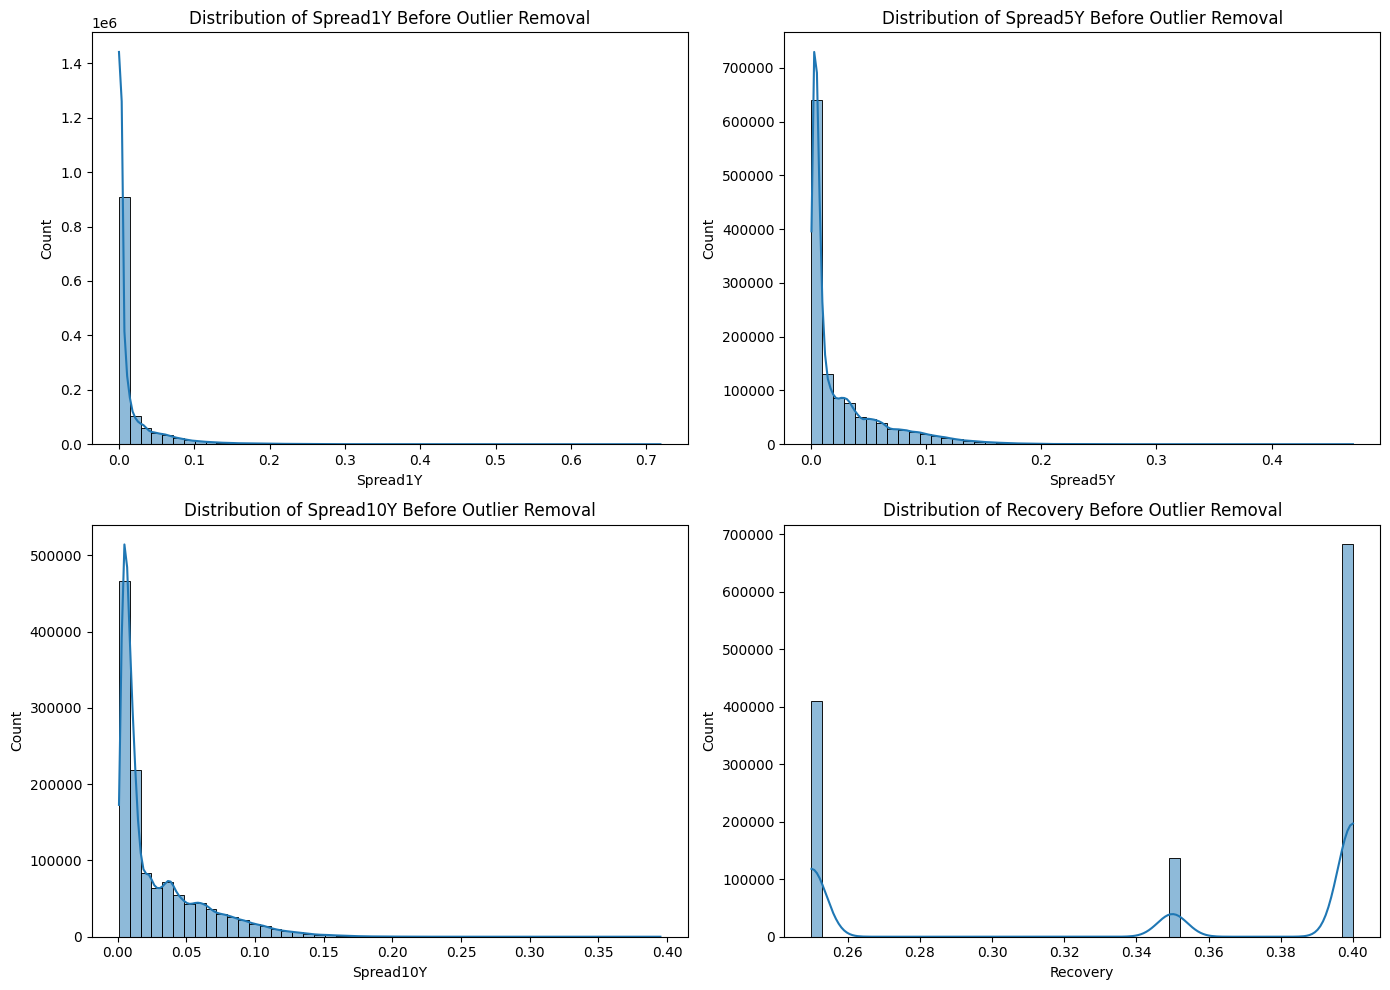

In [129]:
# Visualize distributions of numerical features before outlier removal
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
numerical_columns = ['Spread1Y', 'Spread5Y', 'Spread10Y', 'Recovery']

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"Distribution of {col} Before Outlier Removal")

plt.tight_layout()
plt.show()

In [130]:
# save the data as csv
df.to_csv("D:\OneDrive - University College London\Moodles\Data-Driven Modelling in Financial Markets\Coursework\cleaned_data.csv", index=False)

### Notes: (Outliers, Normalization, Encoding)
#### 1. Fat-tailed distributions are common in financial data, need to use robust methods to detect outliers, blindly removing might not be appropriate. The outlier removal codes are provided below, based on 3 standard deviations.
#### 2. Recovery Rate data shows as category-like data. 
#### 3. Normalization is not always needed, this depends on what models we will use. 
#### 4. Encode the Categorical Variables is not always needed, this depends on what models we will use. 

In [131]:
# outlier_counts = {}

# for col in ['Spread1Y', 'Spread5Y', 'Spread10Y']:
#     before_rows = df.shape[0]
#     z_scores = np.abs(stats.zscore(df[col]))
#     outlier_counts[col] = (z_scores > 3).sum()
#     df = df[z_scores < 3]  # Keep only values within 3 standard deviations
#     after_rows = df.shape[0]
#     print(f"✅ Removed {before_rows - after_rows} outliers from {col}")

# # Plot distributions after outlier removal
# fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# numerical_columns = ['Spread1Y', 'Spread5Y', 'Spread10Y', 'Recovery']

# for i, col in enumerate(numerical_columns):
#     sns.histplot(df[col], bins=50, kde=True, ax=axes[i//2, i%2])
#     axes[i//2, i%2].set_title(f"Distribution of {col} After Outlier Removal")

# plt.tight_layout()
# plt.show()

# # Visualizing Outliers Count Before Removal
# plt.figure(figsize=(8,5))
# sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()))
# plt.title("Outliers Count per Feature (Z-score > 3) Before Removal")
# plt.ylabel("Number of Outliers")
# plt.show()